In [196]:
import numpy as np
import matplotlib.pyplot as plt


import mne

import glob
import os
import pickle
import sys
sys.path.append('../utils')
from ERP_utils import *

### Set up 

In [329]:
#-----------------------------
#           PARAMETERS
#-----------------------------
task = 'motor' #listen or motor
erp_window = '_n05to05'
#erp_window = '_n05to05'

evoked_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_ERP_data{erp_window}_30Hz'
epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data{erp_window}_30Hz'


#period = 'post'
#subjects_to_process = ['05', '06', '07', '08']
subjects_to_process = ['20']




#### TO DO: take equal subsets from each participant?

In [330]:
#           GROUPING EVOKEDS
#-----------------------------

evoked_list_pre = []
epochs_list_pre = []
evoked_list_post = []
epochs_list_post = []

#for file in sorted(os.listdir(evoked_dir)):

for subject in subjects_to_process:
    print('Processing subject: ', subject)
    """    file_evokeds = glob.glob(os.path.join(evoked_dir, f'listen_ERP_{period}_{subject}.fif'))[0]
    file_epochs = glob.glob(os.path.join(epochs_dir, f'listen_epochs_{period}_{subject}.fif'))[0]
    print('Processing subject: ', subject)
    evoked = mne.read_evokeds(file_evokeds)[0]
    evoked_list.append(evoked)
    epochs = mne.read_epochs(file_epochs)
    epochs_list.append(epochs)"""

    file_evokeds_pre = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_pre_{subject}.fif'))[0]
    file_epochs_pre = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_pre_{subject}.fif'))[0]
  
    evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
    evoked_list_pre.append(evoked_pre)
    epochs_pre = mne.read_epochs(file_epochs_pre)
    epochs_list_pre.append(epochs_pre)

    file_evokeds_post = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_post_{subject}.fif'))[0]
    file_epochs_post = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_post_{subject}.fif'))[0]
  
    evoked_post = mne.read_evokeds(file_evokeds_post)[0]
    evoked_list_post.append(evoked_post)
    epochs_post = mne.read_epochs(file_epochs_post)
    epochs_list_post.append(epochs_post)


concat_epochs_pre = mne.concatenate_epochs(epochs_list_pre)
concat_evoked_pre = mne.combine_evoked(evoked_list_pre, weights = 'equal')

concat_epochs_post = mne.concatenate_epochs(epochs_list_post)
concat_evoked_post = mne.combine_evoked(evoked_list_post, weights = 'equal')



Processing subject:  20
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data_n05to05_30Hz/motor_ERP_pre_20.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms (6)
        0 CTF compensation matrices available
        nave = 246 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data_n05to05_30Hz/motor_epochs_pre_20.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
246 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data_n05to05_30Hz/motor_ERP_post_20.fif ...
    Found the data of interest:
        

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_40489/3324349664.py:24: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data_n05to05_30Hz/motor_ERP_pre_20.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_40489/3324349664.py:26: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data_n05to05_30Hz/motor_epochs_pre_20.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_40489/3324349664.py:32: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis

### Plot grand average

In [331]:
mne.viz.set_browser_backend('qt', verbose=None)


'qt'

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


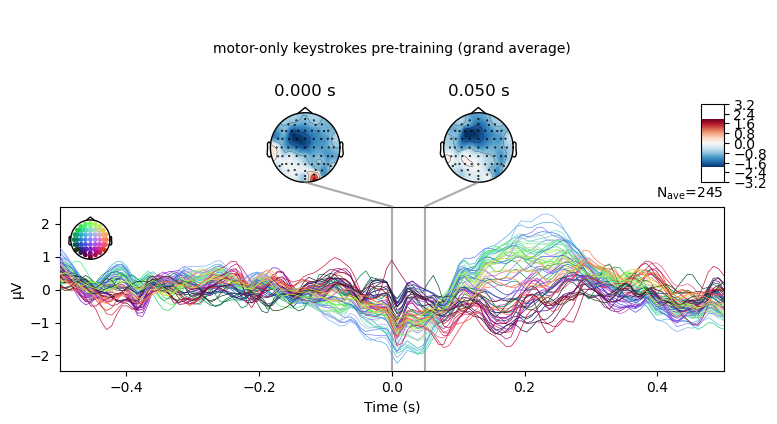

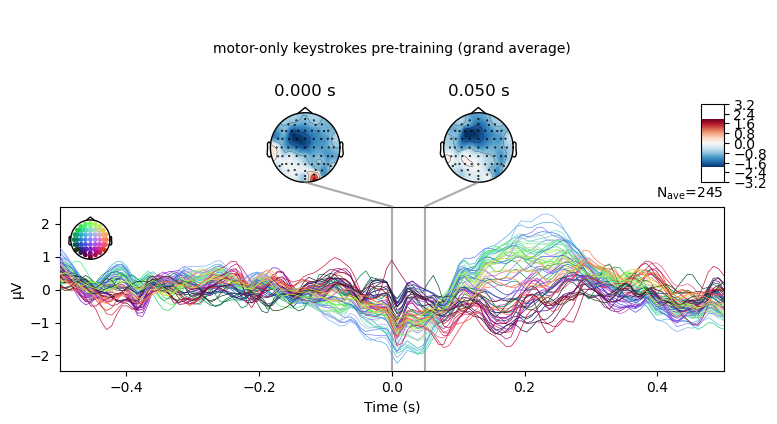

In [332]:
concat_evoked_pre.plot_joint(times =[ 0, 0.05], title= f'{task}-only keystrokes pre-training (grand average)', picks = 'all')

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


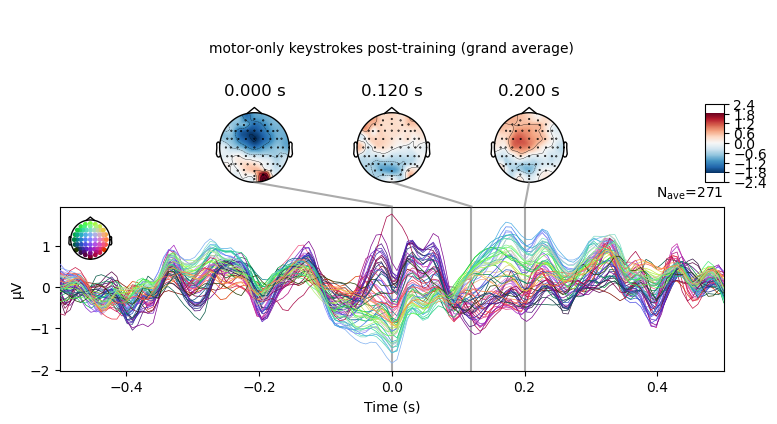

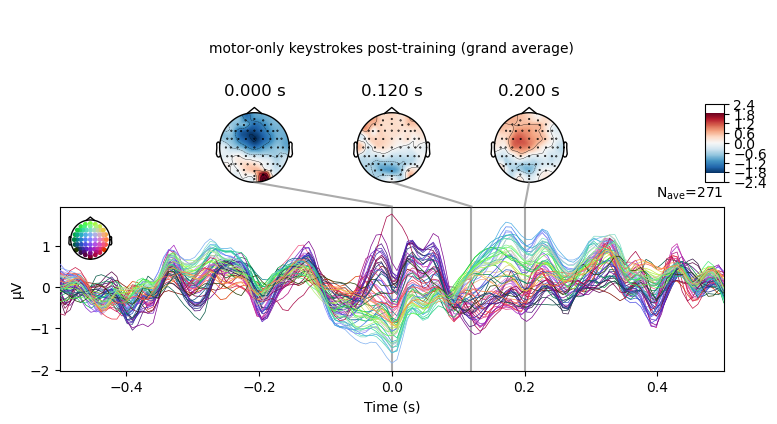

In [333]:
bad_ch = ['Cz']
concat_evoked_post.plot_joint(times =[ 0, 0.12, 0.2], title= f'{task}-only keystrokes post-training (grand average)', picks = 'eeg')

Not setting metadata
246 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_40489/143126035.py:1: RuntimeWarning: Only one channel in group "Cz"; cannot combine by method "mean".
  mne.viz.plot_epochs_image(concat_epochs_pre,
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_40489/143126035.py:1: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_epochs_image(concat_epochs_pre,


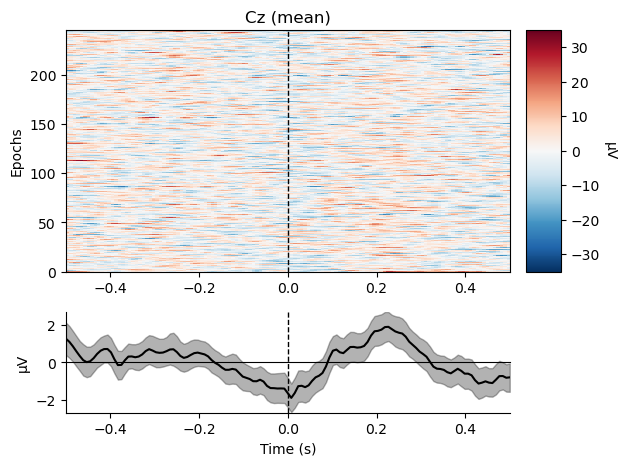

[<Figure size 640x480 with 3 Axes>]

In [334]:
mne.viz.plot_epochs_image(concat_epochs_pre, 
                          picks = ['Cz'], 
                          combine = 'mean')

combining channels using "mean"
combining channels using "mean"


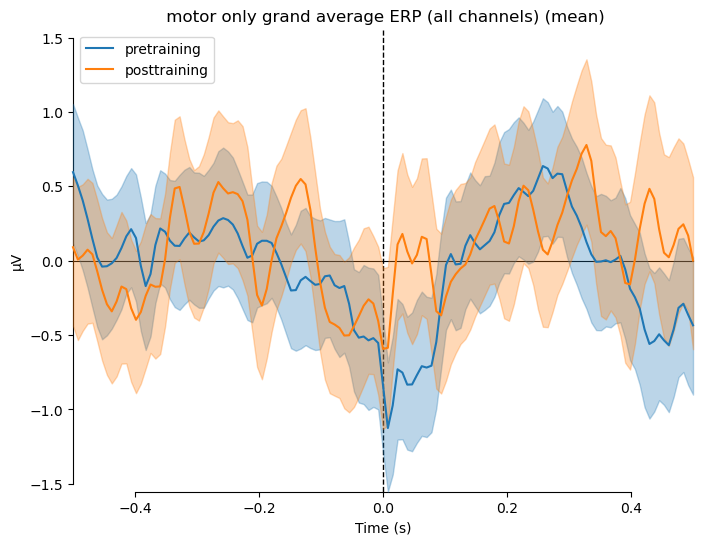

[<Figure size 800x600 with 1 Axes>]

In [335]:
ga = dict(
        pretraining=list(concat_epochs_pre.iter_evoked()),
        posttraining=list(concat_epochs_post.iter_evoked()))
mne.viz.plot_compare_evokeds(ga, title = f' {task} only grand average ERP (all channels)',combine = 'mean')

### Inter-trial coherence

In [336]:
"""freqs_itc = np.linspace(3,15,14)
power, itc = mne.time_frequency.tfr_morlet(concat_epochs_post, freqs = freqs_itc, n_cycles = 1, return_itc = True)"""

'freqs_itc = np.linspace(3,15,14)\npower, itc = mne.time_frequency.tfr_morlet(concat_epochs_post, freqs = freqs_itc, n_cycles = 1, return_itc = True)'

In [337]:
"""#find channels of interest
#get channel names
with open('../utils/ch_names.pkl', 'rb') as file:
    ch_names_all = pickle.load(file)

ch_names_72 = ch_names_all[0:72]
p_channels = ['Cz', 'FCz']
p_ch_idx = ch_index(p_channels)"""

"#find channels of interest\n#get channel names\nwith open('../utils/ch_names.pkl', 'rb') as file:\n    ch_names_all = pickle.load(file)\n\nch_names_72 = ch_names_all[0:72]\np_channels = ['Cz', 'FCz']\np_ch_idx = ch_index(p_channels)"

In [338]:
"""itc.plot(p_ch_idx)"""

'itc.plot(p_ch_idx)'

### Scrap code below

In [339]:
"""# Specify the channels of interest
channels_of_interest = ['Cz', 'Pz', 'FCz', 'AFz', 'Fz']  # replace with your desired channel names

# Pick the channels from the epochs
pretraining_epochs = concat_epochs_pre.pick_channels(channels_of_interest)
posttraining_epochs = concat_epochs_post.pick_channels(channels_of_interest)

# Create the grand average evokeds for pretraining and posttraining
ga = dict(
    pretraining=list(pretraining_epochs.iter_evoked()),
    posttraining=list(posttraining_epochs.iter_evoked())
)

# Plot the grand average ERP
mne.viz.plot_compare_evokeds(ga, title=f'{task} only average ERP', combine='mean')"""

"# Specify the channels of interest\nchannels_of_interest = ['Cz', 'Pz', 'FCz', 'AFz', 'Fz']  # replace with your desired channel names\n\n# Pick the channels from the epochs\npretraining_epochs = concat_epochs_pre.pick_channels(channels_of_interest)\nposttraining_epochs = concat_epochs_post.pick_channels(channels_of_interest)\n\n# Create the grand average evokeds for pretraining and posttraining\nga = dict(\n    pretraining=list(pretraining_epochs.iter_evoked()),\n    posttraining=list(posttraining_epochs.iter_evoked())\n)\n\n# Plot the grand average ERP\nmne.viz.plot_compare_evokeds(ga, title=f'{task} only average ERP', combine='mean')"